In [ ]:
from scipy.optimize import curve_fit

# Define las funciones del modelo nuevamente por claridad
def inverse_power_function(x, a, b, c):
    return a / np.power(x, b) + c

def exp_neg_function(x, a, b, c):
    return a * np.exp(-b * x) + c

# Datos
x_data = np.array([20, 50, 100, 1000, 10000, 100000, 1000000, 10000000])
y_data = np.array([0.25, 0.14, 0.1, 0.015, 0.002, 0.00025, 0.00003, 0.0000035])

# Establece límites para los parámetros: todos los parámetros tienen un límite inferior de 0
# Para el límite superior, puedes usar np.inf para indicar que no hay límite superior o establecer un valor máximo razonable
bounds = (0, np.inf)

# Ajuste de curva con límites para la función de potencia inversa
params_inverse, _ = curve_fit(inverse_power_function, x_data, y_data, bounds=bounds, maxfev=10000)

# Ajuste de curva con límites para la función exponencial negativa
params_exp_neg, _ = curve_fit(exp_neg_function, x_data, y_data, bounds=bounds, maxfev=10000)

# Ahora params_inverse y params_exp_neg contendrán los parámetros ajustados dentro de los límites especificados


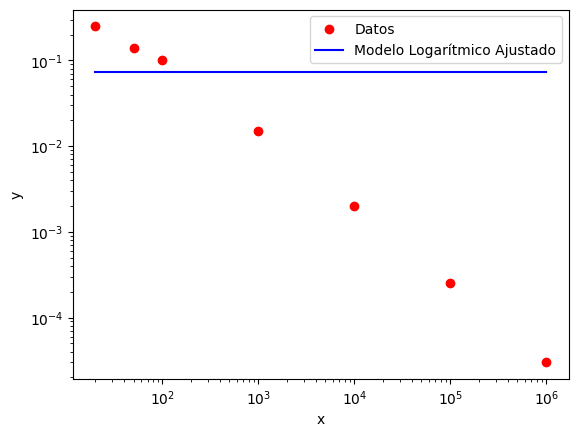

In [ ]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

# Definir la nueva función modelo
def log_model(x, a, b, c):
    return a * np.log(b * x + 1) + c

# Ajustar el código para manejar valores iniciales
params, _ = curve_fit(log_model, x_data, y_data, p0=[1, 1e-6, 1], bounds= bounds, maxfev=10000)

# Graficar los datos y el modelo ajustado
plt.scatter(x_data, y_data, label='Datos', color='red')
x_model = np.linspace(min(x_data), max(x_data), 400)
plt.plot(x_model, log_model(x_model, *params), label='Modelo Logarítmico Ajustado', color='blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


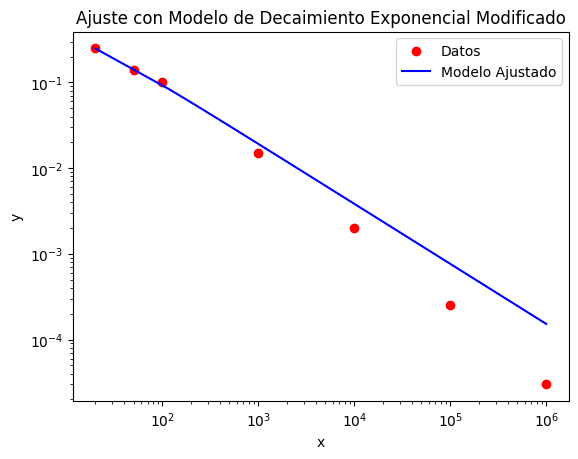

In [ ]:
# Definir el nuevo modelo de decaimiento exponencial modificado
def modified_exponential_decay(x, a, b, c):
    return a / np.power((b * x + 1), c)

# Ajustar este modelo a los datos
params1, _ = curve_fit(modified_exponential_decay, x_data, y_data, p0=[1, 1e-6, 0.6], maxfev=1000000)

# Graficar los datos y el modelo ajustado
plt.scatter(x_data, y_data, color='red', label='Datos')
x_vals = np.linspace(min(x_data), max(x_data), 10000)
plt.plot(x_vals, modified_exponential_decay(x_vals, *params1), label='Modelo Ajustado', color='blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Ajuste con Modelo de Decaimiento Exponencial Modificado')
plt.show()

C:\Users\jcrub\AppData\Local\Temp\ipykernel_28272\453625392.py:2: RuntimeWarning: invalid value encountered in power
  return a / np.power((b * x + 1), c * np.power(x, d))
C:\Users\jcrub\AppData\Local\Temp\ipykernel_28272\453625392.py:2: RuntimeWarning: overflow encountered in power
  return a / np.power((b * x + 1), c * np.power(x, d))


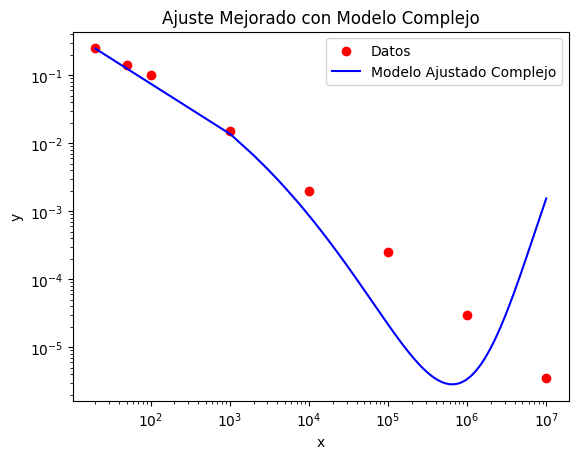

In [ ]:
def modified_exponential_decay_complex(x, a, b, c, d):
    return a / np.power((b * x + 1), c * np.power(x, d))

# Intenta diferentes valores iniciales basados en tu conocimiento del problema
initial_guess = [1, 1e-6, 1, 1e-6]

params2, cov = curve_fit(modified_exponential_decay_complex, x_data, y_data, p0=initial_guess, maxfev=100000)

plt.scatter(x_data, y_data, color='red', label='Datos')
x_vals = np.linspace(min(x_data), max(x_data), 10000)
plt.plot(x_vals, modified_exponential_decay_complex(x_vals, *params2), label='Modelo Ajustado Complejo', color='blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Ajuste Mejorado con Modelo Complejo')
plt.show()


C:\Users\jcrub\AppData\Local\Temp\ipykernel_28272\1290410647.py:2: RuntimeWarning: invalid value encountered in power
  return a / np.power((b * x + 1), c + d * np.log(x+1))
C:\Users\jcrub\AppData\Local\Temp\ipykernel_28272\1290410647.py:2: RuntimeWarning: overflow encountered in divide
  return a / np.power((b * x + 1), c + d * np.log(x+1))


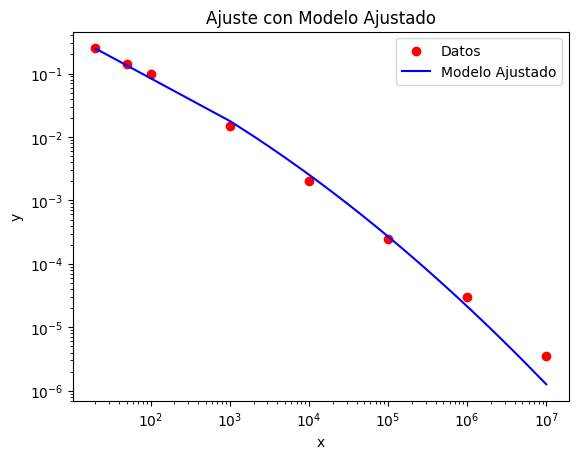

In [ ]:
def adjusted_model(x, a, b, c, d):
    return a / np.power((b * x + 1), c + d * np.log(x+1))

# Proporciona valores iniciales razonables basados en el comportamiento observado de tus datos
initial_guess = [0.2, 1e-6, 0.5, 0.01]

# Ajusta el modelo a los datos
params3, _ = curve_fit(adjusted_model, x_data, y_data, p0=initial_guess, maxfev=10000)

# Grafica los datos y el modelo ajustado
plt.scatter(x_data, y_data, color='red', label='Datos')
x_vals = np.linspace(min(x_data), max(x_data), 10000)
plt.plot(x_vals, adjusted_model(x_vals, *params3), label='Modelo Ajustado', color='blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Ajuste con Modelo Ajustado')
plt.show()


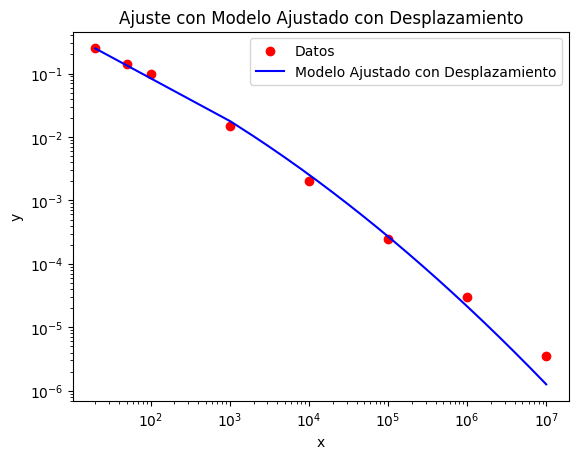

In [ ]:
def adjusted_model_with_offset(x, a, b, c, d):
    return a / np.power((b * x + 1), c + d * np.log(x+1))

# Proporcionar valores iniciales razonables
initial_guess = [0.3, 1e-6, 1, 0.01]

# Ajustar el modelo a los datos
params4, _ = curve_fit(adjusted_model_with_offset, x_data, y_data, p0=initial_guess, bounds = bounds, maxfev=100000)

# Graficar los datos y el modelo ajustado
plt.scatter(x_data, y_data, color='red', label='Datos')
x_vals = np.linspace(min(x_data), max(x_data), 10000)
plt.plot(x_vals, adjusted_model_with_offset(x_vals, *params4), label='Modelo Ajustado con Desplazamiento', color='blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Ajuste con Modelo Ajustado con Desplazamiento')
plt.show()

In [ ]:
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error

# Definir un rango de valores iniciales para explorar
a_values = [0.2, 0.25, 0.3]
b_values = [1e-6, 1e-5, 1e-4]
c_values = [0.8, 1, 1.2]

# Mantener registro del mejor ajuste
best_mse = np.inf
best_params = None

for a in a_values:
    for b in b_values:
        for c in c_values:
            # Ajustar el modelo con el conjunto actual de parámetros iniciales
            try:
                params, _ = curve_fit(adjusted_model, x_data, y_data, p0=[a, b, c], maxfev=100000)
                # Calcular el MSE para este ajuste
                y_pred = adjusted_model(x_data, *params)
                mse = mean_squared_error(y_data, y_pred)
                # Actualizar el mejor ajuste si es necesario
                if mse < best_mse:
                    best_mse = mse
                    best_params = params
            except RuntimeError as e:
                print(f"Error al ajustar con p0=[{a}, {b}, {c}]: {e}")

# Mostrar los mejores parámetros encontrados
print(f"Mejores parámetros: {best_params}, MSE: {best_mse}")


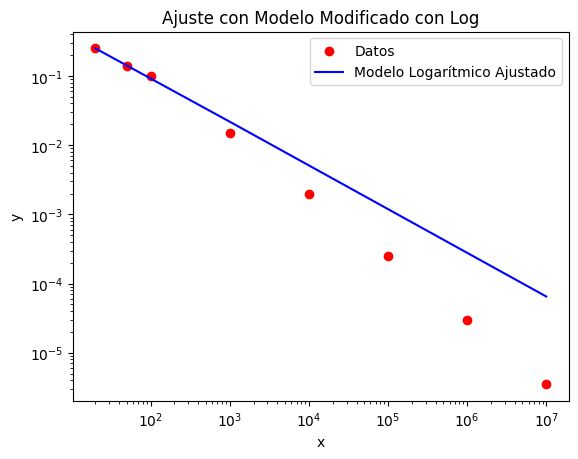

In [ ]:
def modified_model_with_log(x, a, b, c):
    return a / np.power((b * np.log(x + 1) + 1), c)

# Ajustar este modelo a los datos
# params5, _ = curve_fit(modified_model_with_log, x_data, y_data, p0=[0.2, 0.0001, 0.1], maxfev=1000000)

# Graficar los datos y el modelo ajustado
plt.scatter(x_data, y_data, color='red', label='Datos')
x_vals = np.linspace(min(x_data), max(x_data), 10000)
plt.plot(x_vals, modified_model_with_log(x_vals, *best_params), label='Modelo Logarítmico Ajustado', color='blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Ajuste con Modelo Modificado con Log')
plt.show()


C:\Users\jcrub\AppData\Local\Temp\ipykernel_28272\1918744565.py:12: RuntimeWarning: invalid value encountered in power
  return a / np.power((b * x + 1), c + d * np.log(x+1))
C:\Users\jcrub\AppData\Local\Temp\ipykernel_28272\1918744565.py:12: RuntimeWarning: invalid value encountered in power
  return a / np.power((b * x + 1), c + d * np.log(x+1))
C:\Users\jcrub\AppData\Local\Temp\ipykernel_28272\1918744565.py:12: RuntimeWarning: overflow encountered in power
  return a / np.power((b * x + 1), c + d * np.log(x+1))
C:\Users\jcrub\AppData\Local\Temp\ipykernel_28272\1918744565.py:12: RuntimeWarning: divide by zero encountered in divide
  return a / np.power((b * x + 1), c + d * np.log(x+1))
C:\Users\jcrub\AppData\Local\Temp\ipykernel_28272\1918744565.py:12: RuntimeWarning: invalid value encountered in power
  return a / np.power((b * x + 1), c + d * np.log(x+1))
C:\Users\jcrub\AppData\Local\Temp\ipykernel_28272\1918744565.py:12: RuntimeWarning: divide by zero encountered in divide
  retur

Mejores parámetros: [ 2.57561016 14.92228534  0.32543699  0.02770761], con un MSE de: 9.84469954425682e-06


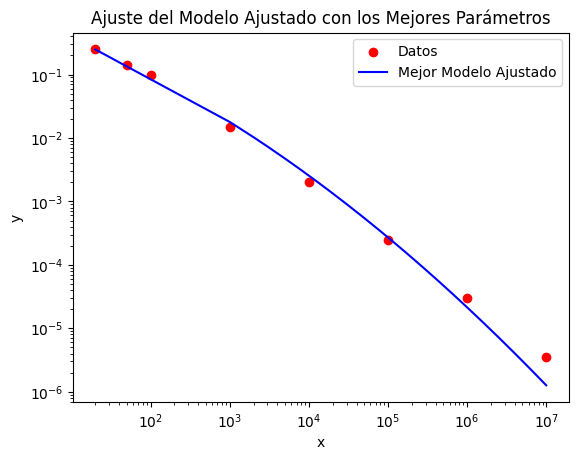

In [ ]:
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Tus datos
x_data = np.array([20, 50, 100, 1000, 10000, 100000, 1000000, 10000000])
y_data = np.array([0.25, 0.14, 0.1, 0.015, 0.002, 0.00025, 0.00003, 0.0000035])

# La función del modelo ajustado
def adjusted_model(x, a, b, c, d):
    return a / np.power((b * x + 1), c + d * np.log(x+1))

# Rangos de valores iniciales para explorar
a_values = [0.2, 0.25, 0.3]
b_values = [1e-6, 1e-5, 1e-4]
c_values = [0.8, 1, 1.2]
d_values = [0.01, 0.1, 0.2]

# Inicialización de variables para almacenar el mejor ajuste
best_mse = np.inf
best_params = None

# Explorar combinaciones de valores iniciales
for a in a_values:
    for b in b_values:
        for c in c_values:
            for d in d_values:
                try:
                    # Ajustar el modelo con los valores iniciales actuales
                    params, _ = curve_fit(adjusted_model, x_data, y_data, p0=[a, b, c, d], maxfev=10000)
                    # Calcular y predecir usando los parámetros ajustados
                    y_pred = adjusted_model(x_data, *params)
                    mse = mean_squared_error(y_data, y_pred)
                    # Actualizar el mejor MSE y los parámetros si se encuentra un ajuste mejor
                    if mse < best_mse:
                        best_mse = mse
                        best_params = params
                except RuntimeError as e:
                    print(f"No se pudo ajustar con p0=[{a}, {b}, {c}, {d}]: {e}")

# Mostrar los mejores parámetros y el MSE
print(f"Mejores parámetros: {best_params}, con un MSE de: {best_mse}")

# Opcional: graficar los datos y el mejor modelo ajustado
plt.scatter(x_data, y_data, color='red', label='Datos')
x_vals = np.linspace(min(x_data), max(x_data), 10000)
plt.plot(x_vals, adjusted_model(x_vals, *best_params), label='Mejor Modelo Ajustado', color='blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Ajuste del Modelo Ajustado con los Mejores Parámetros')
plt.show()


In [ ]:
import numpy as np

def adjusted_model_modified(x, a, b, c, d):
    # Calcular el valor de la función original multiplicado por x
    value = x * (a / np.power((b * x + 1), c + d * np.log(x + 1)))
    # Definir el valor de retorno basado en la condición
    return np.where(value > 27, 30, value)


In [ ]:
# Suponiendo que tenemos 'best_params' como los mejores parámetros encontrados previamente
a, b, c, d = best_params

# Generar un rango de valores de x
x_values = np.linspace(0, 10000000, 100000)

# Evaluar la función para estos valores de x
y_values = adjusted_model_modified(x_values, a, b, c, d)

# Encontrar el valor de x para el cual la función comienza a devolver 30
threshold_index = np.where(y_values == 30)[0][0] if np.any(y_values == 30) else -1
if threshold_index != -1:
    threshold_x = x_values[threshold_index]
    print(f"Valor de x para el umbral: {threshold_x}")
else:
    print("No se encontró un umbral dentro del rango de x proporcionado.")


Valor de x para el umbral: 23900.239002390023


In [ ]:
x_range = np.logspace(0, 9, num=10, base=10)
x_range = np.insert(x_range, 0, 0)

print(x_range)

for a in x_range:
    i = i + 1
    print(adjusted_model(a, best_params[0], best_params[1], best_params[2], best_params[3]) *a)

# print(inverse_power_function(a, params_inverse[0], params_inverse[1], params_inverse[2]) *a)

# print(exp_neg_function(a, params_exp_neg[0], params_exp_neg[1], params_exp_neg[2]) *a)

# print(log_model(a, params[0], params[1], params[2]) *a)

# print(modified_exponential_decay(a, params1[0], params1[1], params1[2]) *a)

# print(modified_exponential_decay_complex(a, params2[0], params2[1], params2[2], params2[3]) *a)

# print(adjusted_model_with_offset(a, params4[0], params4[1], params4[2], params4[3]) *a)

# print(modified_model_with_log(a, best_params[0], best_params[1], best_params[2]) *a)

[0.e+00 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07 1.e+08
 1.e+09]
0.0
0.9922430367922773
3.6129963067729074
9.375922277143134
17.929493669884195
25.51303564815249
27.055622105670892
21.386623469659135
12.60164370088545
5.534950672616335
1.8121829997099737


In [ ]:
def crea_df_std(df, row_names='all', col_names=['name', 'type', 'prio', 'card', 'card%', 'NaN', 'Unknown', '%_NaN', 'Category']):
    """
    Crea un DataFrame de resumen (df_std) para analizar la estructura de datos de un DataFrame dado (df).
    Proporciona información sobre el tipo de datos, la cardinalidad, el número de valores NaN y Unknown,
    el porcentaje de valores NaN y Unknown (%_NaN), y categoriza cada columna en 'Binaria', 'Categórica', 
    'Numérica Discreta' o 'Numérica Continua' basado en su cardinalidad y tipo de datos.

    Args:
        df (DataFrame): DataFrame de pandas a analizar.
        row_names (list, optional): Lista de nombres de columnas a incluir en el análisis. 'all' analiza todas las columnas.
        col_names (list, optional): Nombres de las columnas en el DataFrame de resumen.

    Returns:
        DataFrame: Un DataFrame de resumen con las columnas especificadas en col_names.
    """

    if row_names == 'all':
        row_names = df.columns

    row_types = []
    row_prio = []
    card = []
    card_per = []
    nan_counts = []
    unknown_counts = []
    null_per = []
    categories = []

    for col_name in row_names:
        col_type = df[col_name].dtype
        unique_values = df[col_name].nunique()
        percent_unique = round((unique_values / len(df) * 100), 2)
        nan_count = df[col_name].isna().sum()
        # Cuenta 'Unknown' en diferentes capitalizaciones
        unknown_count = df[col_name].apply(lambda x: str(x).lower() == 'unknown').sum()
        total_missing = nan_count + unknown_count
        null_percent = round((total_missing / len(df) * 100), 2)
        
        if unique_values == 2:
            category = 'Binaria'
        elif pd.api.types.is_numeric_dtype(col_type) and (unique_values > 6 and unique_values <= 20 or (percent_unique >= 5 and percent_unique <= 20)):
            category = 'Numérica Discreta'
        elif unique_values <= 10 and percent_unique > 1 or unique_values <= 6:
            category = 'Categórica'
        else:  # Para el resto de casos, consideramos la columna como Numérica Continua
            category = 'Numérica Continua'
        
        row_types.append(col_type)
        row_prio.append(3)  # Valor predeterminado, considerar hacerlo configurable o explicar su significado
        card.append(unique_values)
        card_per.append(percent_unique)
        nan_counts.append(nan_count)
        unknown_counts.append(unknown_count)
        null_per.append(null_percent)
        categories.append(category)
    
    df_std = pd.DataFrame(list(zip(row_names, row_types, row_prio, card, card_per, nan_counts, unknown_counts, null_per, categories)), columns=col_names)
    return df_std